## Import Library

In [1]:
# Install gdown
!pip install --upgrade gdown

# load folder/file
import os
import glob

# List file dalam folder kerja colab
os.listdir()

# Import library utama
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import math

## Load Data

In [2]:
# Load semua isi folder curah hujan 2013-2024
!gdown --folder https://drive.google.com/drive/folders/1eFDrUPixpysf1pg6uiQycjZj4CMIVKQ_?usp=drive_link


Retrieving folder contents
Processing file 128hNIurvkVhRSKutEZSAtKjGSiU4quKW Banyaknya Curah Hujan, 2013.csv
Processing file 1WoovqfonHxhXdwSGDLsEpWZggex5ZUEv Banyaknya Curah Hujan, 2014.csv
Processing file 1_9OtmqQKE5XIvnkB7-YcoZTDLdsA_8gj Banyaknya Curah Hujan, 2015.csv
Processing file 1MFtRzKT4wfKFmaN3oOUgmNW2mgZpjM7V Banyaknya Curah Hujan, 2016.csv
Processing file 1ZZot0LhZ6t5O7Q9pLNHCIqgteWfOuGXh Banyaknya Curah Hujan, 2017.csv
Processing file 1j333y87RnSSlnSP81xsr_SntX94e9CFD Banyaknya Curah Hujan, 2018.csv
Processing file 1FejMYvhYowP7FsU926CwXGQtLDwdfQHg Banyaknya Curah Hujan, 2019.csv
Processing file 1mxKplE6idq79asaquaKDHI2N8Oy16gbC Banyaknya Curah Hujan, 2020.csv
Processing file 1lrHSECqmq1eR4lD78uvccWbVsrQxtMkL Banyaknya Curah Hujan, 2021.csv
Processing file 1ZvS_mHIQojFOhBNdVEc-KZQOeEcp94sl Banyaknya Curah Hujan, 2022.csv
Processing file 1i_IRnC3y3Uj5EseFmHwdNdV2x4NqApbA Banyaknya Curah Hujan, 2023.csv
Processing file 1Eqrkep2vZQnBNS2_-30W6fZmMgwxHfM5 Banyaknya Curah Hujan

**Menggabungkan Data 2013-2024**

In [3]:
# Ambil semua file CSV di folder hasil download
all_files = glob.glob(os.path.join("Dataset Curah Hujan", "*.csv"))

# Gabungkan semua file ke dalam satu dataframe
df_list = []
for file in all_files:
  year = int(file.split(',')[-1].split('.')[0].strip())
  df_temp = pd.read_csv(file, skiprows=2)
  df_temp['Tahun'] = year
  df_list.append(df_temp)

# Satukan semua dataframe
df = pd.concat(df_list, ignore_index=True)

# Simpan jadi satu file CSV
df.to_csv("Data_Curah_Hujan_GabunganAwal.csv", index=False)

# Cek hasil
df.head(14)

,Unnamed: 0,Kendal,Weleri,Kaliwungu,Boja,Sukorejo,rata-rata,Tahun
0,NaN,2023,2023,2023,2023,2023,2023,2023
1,Januari,254,217,284,510,383,330,2023
2,Februari,275,333,377,327,500,362,2023
3,Maret,191,201,135,320,223,214,2023
4,April,58,77,69,383,301,178,2023
5,Mei,132,65,80,192,129,120,2023
6,Juni,73,32,38,23,54,44,2023
7,Juli,-,6,10,55,56,25,2023
8,Agustus,-,-,-,-,-,-,2023
9,September,-,-,-,-,-,-,2023


**Merapihkan Kolom dan menambah kolom number_num**

In [4]:
# Baca data hasil gabungan
df = pd.read_csv("Data_Curah_Hujan_GabunganAwal.csv")

# rapikan kolom
df = df.rename(columns={
    df.columns[0]: "Bulan dan Jumlah",
    df.columns[1]: "Kendal",
    df.columns[2]: "Weleri",
    df.columns[3]: "Kaliwungu",
    df.columns[4]: "Boja",
    df.columns[5]: "Sukorejo",
    df.columns[6]: "rata-rata",
    df.columns[7]: "Tahun"
})

# Mapping bulan ke angka
bulan_order = {
    "Januari": 1, "Februari": 2, "Maret": 3, "April": 4,
    "Mei": 5, "Juni": 6, "Juli": 7, "Agustus": 8,
    "September": 9, "Oktober": 10, "November": 11, "Desember": 12
}

# Tambahkan kolom bulan_num untuk mempermudah analisis
df["Bulan_num"] = df["Bulan dan Jumlah"].map(bulan_order)

# Lihat kolom dan beberapa data awal
print(df.columns)
df.head(14)

Index(['Bulan dan Jumlah', 'Kendal', 'Weleri', 'Kaliwungu', 'Boja', 'Sukorejo',
       'rata-rata', 'Tahun', 'Bulan_num'],
      dtype='object')


,Bulan dan Jumlah,Kendal,Weleri,Kaliwungu,Boja,Sukorejo,rata-rata,Tahun,Bulan_num
0,NaN,2023,2023,2023,2023,2023,2023,2023,NaN
1,Januari,254,217,284,510,383,330,2023,1.0
2,Februari,275,333,377,327,500,362,2023,2.0
3,Maret,191,201,135,320,223,214,2023,3.0
4,April,58,77,69,383,301,178,2023,4.0
5,Mei,132,65,80,192,129,120,2023,5.0
6,Juni,73,32,38,23,54,44,2023,6.0
7,Juli,-,6,10,55,56,25,2023,7.0
8,Agustus,-,-,-,-,-,-,2023,8.0
9,September,-,-,-,-,-,-,2023,9.0


**Mengurutkan data berdasarkan tahun dan bulan**

In [5]:
# Pisahkan bulanan dan total
df_bulanan = df.dropna(subset=["Bulan_num"]).copy()
df_total   = df[df["Bulan dan Jumlah"].str.contains("Total", case=False, na=False)].copy()

# Susun ulang per tahun
final_list = []
for tahun in sorted(df_bulanan["Tahun"].unique()):
    data_tahun = df_bulanan[df_bulanan["Tahun"] == tahun].sort_values("Bulan_num")
    total_tahun = df_total[df_total["Tahun"] == tahun]
    # gabungkan: bulan + total (total selalu setelah desember)
    data_gabung = pd.concat([data_tahun, total_tahun], ignore_index=True)
    final_list.append(data_gabung)

df_final = pd.concat(final_list, ignore_index=True)

# Simpan hasil akhir
df_final.to_csv("Data_Curah_Hujan_Kendal_GabunganAkhir.csv", index=False)

# Cek hasil
df_final.head (13)

,Bulan dan Jumlah,Kendal,Weleri,Kaliwungu,Boja,Sukorejo,rata-rata,Tahun,Bulan_num
0,Januari,621,568,487,526,454,531,2013,1.0
1,Februari,254,357,172,428,486,339,2013,2.0
2,Maret,100,106,50,633,512,280,2013,3.0
3,April,138,109,142,663,358,282,2013,4.0
4,Mei,85,163,84,208,252,158,2013,5.0
5,Juni,247,246,247,465,202,281,2013,6.0
6,Juli,71,127,121,160,328,161,2013,7.0
7,Agustus,14,30,55,65,14,33,2013,8.0
8,September,40,19,0,53,40,22,2013,9.0
9,Oktober,95,28,88,214,110,107,2013,10.0


## **Data Preprocessing**

In [6]:
# hapus baris "Total" karena hasil penjumlahan, bukan data bulanan asli
df_bulanan = df_final[df_final["Bulan dan Jumlah"] != "Total"].copy()

# cek apakah sudah terhapus
df_bulanan.head(13)

,Bulan dan Jumlah,Kendal,Weleri,Kaliwungu,Boja,Sukorejo,rata-rata,Tahun,Bulan_num
0,Januari,621,568,487,526,454,531,2013,1.0
1,Februari,254,357,172,428,486,339,2013,2.0
2,Maret,100,106,50,633,512,280,2013,3.0
3,April,138,109,142,663,358,282,2013,4.0
4,Mei,85,163,84,208,252,158,2013,5.0
5,Juni,247,246,247,465,202,281,2013,6.0
6,Juli,71,127,121,160,328,161,2013,7.0
7,Agustus,14,30,55,65,14,33,2013,8.0
8,September,40,19,0,53,40,22,2013,9.0
9,Oktober,95,28,88,214,110,107,2013,10.0


**Insight :**

Menghapus kolom total bertujuan untuk mempermudah proses selanjutnya, kolom total tidak bisa ikut dalam proses pelatihan model karena kolom total adalah hasil dari penjumlahan

In [7]:
# Cek tipe data tiap kolom
print(df_bulanan.info())

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 154
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Bulan dan Jumlah  144 non-null    object 
 1   Kendal            144 non-null    object 
 2   Weleri            144 non-null    object 
 3   Kaliwungu         144 non-null    object 
 4   Boja              144 non-null    object 
 5   Sukorejo          144 non-null    object 
 6   rata-rata         144 non-null    object 
 7   Tahun             144 non-null    int64  
 8   Bulan_num         144 non-null    float64
dtypes: float64(1), int64(1), object(7)
memory usage: 11.2+ KB
None


Insight : Terlihat bahwa tipe data bulan dan jumlah, kota, dan rata-rata masih berbentuk object, sehingga kita akan mengganti dulu menjadi numerik

In [8]:
# terdapat kolom yang kosong/strip jadi ganti dengan np.nan
df_bulanan.replace(["-", " ", ""], np.nan, inplace=True)

# konversi tipe data objel ke numerik
kolom_curah = ["Kendal", "Weleri", "Kaliwungu", "Boja", "Sukorejo", "rata-rata"]

for col in kolom_curah:
    df_bulanan[col] = pd.to_numeric(df_bulanan[col], errors="coerce")

# cek hasil akhir
df_bulanan.head(156)

,Bulan dan Jumlah,Kendal,Weleri,Kaliwungu,Boja,Sukorejo,rata-rata,Tahun,Bulan_num
0,Januari,621.0,568.0,487.0,526.0,454.0,531.0,2013,1.0
1,Februari,254.0,357.0,172.0,428.0,486.0,339.0,2013,2.0
2,Maret,100.0,106.0,50.0,633.0,512.0,280.0,2013,3.0
3,April,138.0,109.0,142.0,663.0,358.0,282.0,2013,4.0
4,Mei,85.0,163.0,84.0,208.0,252.0,158.0,2013,5.0
...,...,...,...,...,...,...,...,...,...
150,Agustus,28.0,3.0,8.0,42.0,13.0,19.0,2024,8.0
151,September,27.0,74.0,30.0,178.0,190.0,100.0,2024,9.0
152,Oktober,18.0,NaN,32.0,60.0,65.0,35.0,2024,10.0
153,November,205.0,241.0,116.0,477.0,621.0,332.0,2024,11.0


In [9]:
# cek missing values
print("Missing values per column:")
print(df_bulanan.isnull().sum())

Missing values per column:
Bulan dan Jumlah     0
Kendal              11
Weleri              11
Kaliwungu            9
Boja                 8
Sukorejo             8
rata-rata            5
Tahun                0
Bulan_num            0
dtype: int64


In [10]:
# Isi missing values dengan interpolasi per kolom (berdasarkan waktu)
df_bulanan = df_bulanan.sort_values(["Tahun", "Bulan_num"])

for col in kolom_curah:
    df_bulanan[col] = df_bulanan[col].interpolate(method="linear")

# Cek lagi apakah masih ada NaN/misssing value
print(df_bulanan.isnull().sum())


Bulan dan Jumlah    0
Kendal              0
Weleri              0
Kaliwungu           0
Boja                0
Sukorejo            0
rata-rata           0
Tahun               0
Bulan_num           0
dtype: int64


In [11]:
# membuat kolom datetime index untuk mempermudah sorting dan tahap selanjutnya
df_bulanan.loc[:, "Tanggal"] = pd.to_datetime(
    dict(year=df_bulanan["Tahun"], month=df_bulanan["Bulan_num"], day=1)
)
df_bulanan = df_bulanan.set_index("Tanggal")

df_bulanan.head()

,Bulan dan Jumlah,Kendal,Weleri,Kaliwungu,Boja,Sukorejo,rata-rata,Tahun,Bulan_num
Tanggal,,,,,,,,,
2013-01-01,Januari,621.0,568.0,487.0,526.0,454.0,531.0,2013,1.0
2013-02-01,Februari,254.0,357.0,172.0,428.0,486.0,339.0,2013,2.0
2013-03-01,Maret,100.0,106.0,50.0,633.0,512.0,280.0,2013,3.0
2013-04-01,April,138.0,109.0,142.0,663.0,358.0,282.0,2013,4.0
2013-05-01,Mei,85.0,163.0,84.0,208.0,252.0,158.0,2013,5.0


## **Data Preparation**

In [12]:
# Menmbil hanya kolom rata-rata sebagai time series
ts = pd.to_numeric(df_bulanan["rata-rata"])
ts = ts.asfreq("MS")   # frekuensi bulanan
ts = ts.interpolate()

**Insight :**

Pada studi kasus ini, prediksi akan dilakukan berdasarkan kolom rata-rata untuk memperkirakan rata-rata curah hujan pada tahun berikutnya.

In [13]:
print("=== Uji Stasioneritas ADF Test ===")
adf_result = adfuller(ts.dropna())
print(f"ADF Statistic : {adf_result[0]:.4f}")
print(f"p-value       : {adf_result[1]:.4f}")
for key, value in adf_result[4].items():
    print(f"Critical Value {key} : {value:.4f}")

if adf_result[1] < 0.05:
    print("✅ Data sudah stasioner")
else:
    print("⚠️ Data tidak stasioner, perlu differencing")


=== Uji Stasioneritas ADF Test ===
ADF Statistic : -3.3265
p-value       : 0.0137
Critical Value 1% : -3.4821
Critical Value 5% : -2.8842
Critical Value 10% : -2.5789
✅ Data sudah stasioner


**Insight :**

Hasil dari p-value adalah 0.01 atau <0.05 yang artinya data ini sudah stasioner sehingga dapat di lambangkan d=1 untuk menentukan parameter sarimax

<Figure size 1200x500 with 0 Axes>

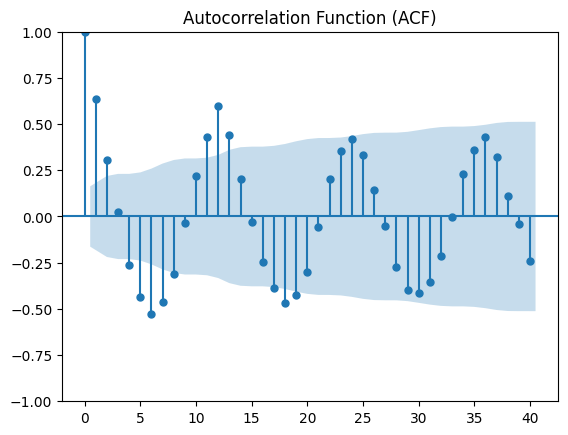

<Figure size 1200x500 with 0 Axes>

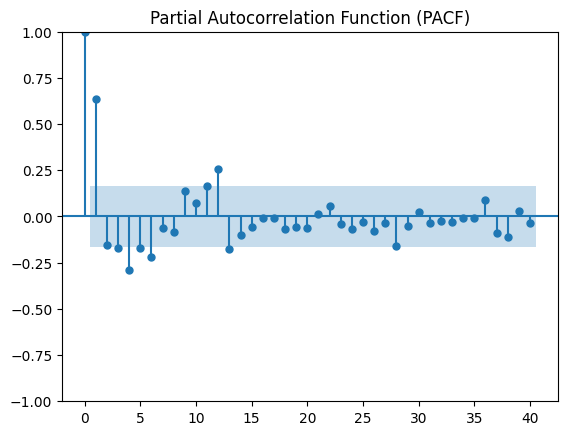

In [14]:
# Plot ACF dan PACF
plt.figure(figsize=(12,5))
plot_acf(ts.dropna(), lags=40)
plt.title("Autocorrelation Function (ACF)")
plt.show()

plt.figure(figsize=(12,5))
plot_pacf(ts.dropna(), lags=40)
plt.title("Partial Autocorrelation Function (PACF)")
plt.show()

**Insight :**

Berdasarkan plot PACF ACF dapat disimpulkan :
1. ACF
- Pola ACF menunjukkan spike signifikan di lag 12, 24, 36 → ini indikasi adanya pola musiman dengan periode tahunan (12 bulan).
- Selain itu, banyak lag awal (1–5) juga signifikan, artinya ada keterkaitan jangka pendek antar bulan.
2. PACF
- PACF signifikan di lag 1 (kuat) → ini mengindikasikan adanya komponen autoregressive (AR).
- Setelah lag 1, sebagian besar spike menurun dan masuk ke dalam batas kepercayaan, artinya AR orde rendah bisa cukup.

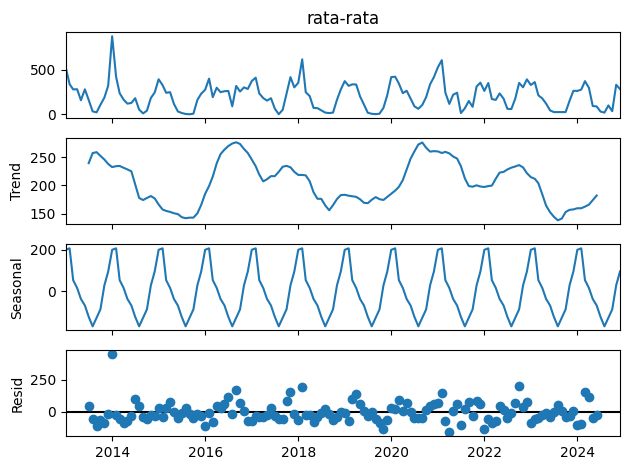

In [15]:
# Seasonal decomposition untuk lihat tren dan musiman
decomposition = seasonal_decompose(ts, model="additive", period=12)
decomposition.plot()
plt.show()

**Insight:**

1. Grafik Tren
- terlihat naik turun, artinya ada pola jangka panjang, trend curah hujan naik lalu turun dengan beberapa puncak sekitar 2016, 2019, dan 2021–2022.
2. Grafik Seasonal
- grafik memperlihatkan pola musiman yang berulang setiap tahun (puncak-lembah-puncak). Pola tersebut konsisten, artinya dalam periode tertentu (misalnya bulanan/tahunan) selalu ada kenaikan dan penurunan dengan bentuk yang hampir sama.
3. Grafik Residual
- fluktuasi acak yang relatif kecil setelah trend dan seasonal dipisahkan.

Kesimpulan : jika diliha dari beberapa grafik diatas, dapat disimpulkan bahwa data ini memiliki pola musiman (berulang), sehingga metode yang ditentukan adalah Sarimax

**Train Test Split**

In [16]:
# train(2013-2021) dan test (2021-2024)
train_bulanan = ts[: "2021-12"]
test_bulanan  = ts["2022-01" : "2024-12"]

print("\nJumlah data train :", len(train_bulanan))
print("Jumlah data test  :", len(test_bulanan))


Jumlah data train : 108
Jumlah data test  : 36


## **Modelling Arima**

Dari hasil pre processing yang dilakukan dapat dilihat bahwa parameter sarimax ditentukan dengan (p, d, q, s) yang menghasilkan (p=1, d=0, q=1, dan s=12)

In [17]:
model = SARIMAX(train_bulanan,
                order=(1,0,1),
                seasonal_order=(1,0,1,12),
                enforce_stationarity=False,
                enforce_invertibility=False)
model_fit = model.fit(disp=False)

print("\n=== SARIMA Model Summary ===")
print(model_fit.summary())


=== SARIMA Model Summary ===
                                     SARIMAX Results                                      
Dep. Variable:                          rata-rata   No. Observations:                  108
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -562.733
Date:                            Sat, 13 Sep 2025   AIC                           1135.467
Time:                                    09:48:20   BIC                           1148.183
Sample:                                01-01-2013   HQIC                          1140.603
                                     - 12-01-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8122      0.069     11.789      0.000       0.677       0.947
ma.L1

## **Evaluasi**

In [18]:
forecast_test = model_fit.get_forecast(steps=len(test_bulanan))
pred_test = forecast_test.predicted_mean
conf_test = forecast_test.conf_int()
mae = mean_absolute_error(test_bulanan, pred_test)
rmse = math.sqrt(mean_squared_error(test_bulanan, pred_test))
mape = mean_absolute_percentage_error(test_bulanan, pred_test)

print("\n=== Evaluasi Data Test (2022–2024) ===")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"MAPE : {mape:.2f}")


=== Evaluasi Data Test (2022–2024) ===
MAE  : 97.85
RMSE : 133.28
MAPE : 0.49


## **Prediksi**

In [19]:
forecast_future = model_fit.get_forecast(steps=2*12)  # 5 tahun x 12 bulan
pred_future = forecast_future.predicted_mean
conf_future = forecast_future.conf_int()

# Set index datetime untuk 2025-01 hingga 2029-12
future_index = pd.date_range(start='2025-01-01', periods=2*12, freq='MS')
pred_future.index = future_index
conf_future.index = future_index

print("\n=== Prediksi Rata-rata Curah Hujan Bulanan (2025–2026) ===")
pred_future.head(24)


=== Prediksi Rata-rata Curah Hujan Bulanan (2025–2026) ===


,predicted_mean
2025-01-01,379.212744
2025-02-01,403.233117
2025-03-01,193.639391
2025-04-01,114.436788
2025-05-01,158.829239
2025-06-01,163.777351
2025-07-01,35.704666
2025-08-01,59.370606
2025-09-01,98.180760
2025-10-01,58.284449


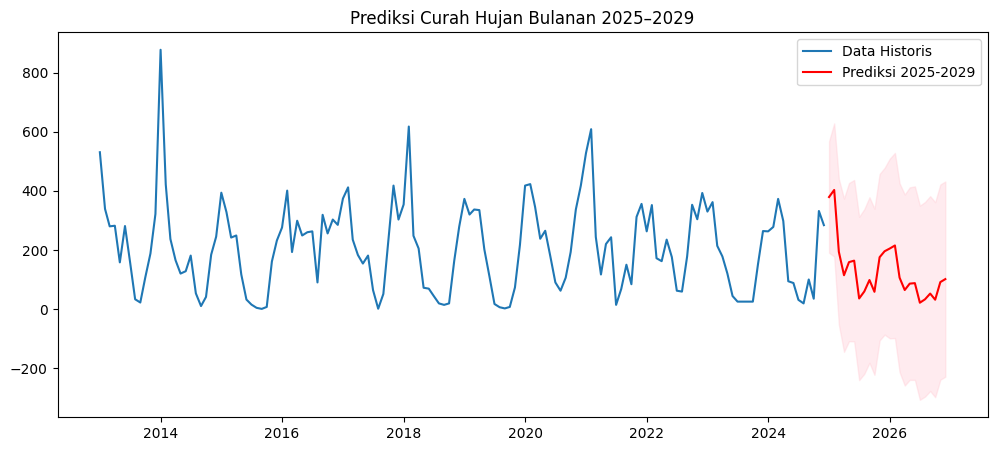

In [20]:
# Plot prediksi
plt.figure(figsize=(12,5))
plt.plot(ts, label='Data Historis')
plt.plot(pred_future, label='Prediksi 2025-2029', color='red')
plt.fill_between(conf_future.index, conf_future.iloc[:,0], conf_future.iloc[:,1], color='pink', alpha=0.3)
plt.title("Prediksi Curah Hujan Bulanan 2025–2029")
plt.legend()
plt.show()

**Insight :**

Berdasarkan hasil prediksi curah hujan bulanan tahun 2025–2026 terlihat bahwa pola curah hujan masih menunjukkan fluktuasi seperti pada data historis, namun intensitasnya cenderung lebih rendah dibandingkan tahun-tahun sebelumnya. Pada periode historis terdapat bulan-bulan dengan curah hujan yang sangat tinggi hingga di atas 600 bahkan 800 mm, sedangkan pada hasil prediksi puncak curah hujan hanya berada pada kisaran 200–300 mm. Selain itu, pola naik-turun tetap terlihat, tetapi dengan variasi yang tidak sebesar data historis. Hal ini mengindikasikan bahwa meskipun curah hujan di masa mendatang diperkirakan tetap mengikuti pola musiman, intensitas rata-ratanya cenderung menurun.